In [19]:
# Import modules and packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from datetime import datetime
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from datetime import datetime
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam, SGD
from sklearn.preprocessing import MinMaxScaler
import math

from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, TensorBoard
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
%matplotlib inline

In [20]:
# Importing Training Set
dataset_train = pd.read_csv('dataset2.csv')

# Select features (columns) to be involved intro training and predictions
cols = list(dataset_train)[1:6]

# Extract dates (will be used in visualization)
datelist_train = list(dataset_train['Date'])
datelist_train = [dt.datetime.strptime(date, '%Y-%m-%d').date() for date in datelist_train]

print('Training set shape == {}'.format(dataset_train.shape))
print('All timestamps == {}'.format(len(datelist_train)))
print('Featured selected: {}'.format(cols))

Training set shape == (2800, 7)
All timestamps == 2800
Featured selected: ['Open', 'High', 'Low', 'Close', 'Adj Close']


In [21]:
test=dataset_train.iloc[239:]['Open']
print(test)

239       224.701004
240       231.548996
241       229.895004
242       229.113998
243       230.255997
            ...     
2795    20262.480469
2796    20041.035156
2797    19615.154297
2798    20298.611328
2799    19799.582031
Name: Open, Length: 2561, dtype: float64


In [22]:
dataset_train = dataset_train[cols].astype(str)
for i in cols:
    for j in range(0, len(dataset_train)):
        dataset_train[i][j] = dataset_train[i][j].replace(',', '')

dataset_train = dataset_train.astype(float)

# Using multiple features (predictors)
training_set = dataset_train.to_numpy()

print('Shape of training set == {}.'.format(training_set.shape))
training_set

Shape of training set == (2800, 5).


array([[  320.434998,   320.434998,   314.002991,   314.248993,
          314.248993],
       [  314.07901 ,   315.838989,   313.565002,   315.032013,
          315.032013],
       [  314.846008,   315.149994,   281.082001,   281.082001,
          281.082001],
       ...,
       [19615.154297, 20357.462891, 19600.785156, 20297.994141,
        20297.994141],
       [20298.611328, 20542.644531, 19617.640625, 19796.808594,
        19796.808594],
       [19799.582031, 20420.990234, 19799.582031, 20049.763672,
        20049.763672]])

In [23]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
training_set_scaled = sc.fit_transform(training_set)

sc_predict = StandardScaler()
sc_predict.fit_transform(training_set[:, 0:1])

array([[-0.76843532],
       [-0.76881797],
       [-0.7687718 ],
       ...,
       [ 0.39317465],
       [ 0.43432116],
       [ 0.40427784]])

In [24]:
# Creating a data structure with 90 timestamps and 1 output
X_train = []
y_train = []

n_future = 60   # Number of days we want top predict into the future
n_past = 90     # Number of past days we want to use to predict the future

for i in range(n_past, len(training_set_scaled) - n_future +1):
    X_train.append(training_set_scaled[i - n_past:i, 0:dataset_train.shape[1] - 1])
    y_train.append(training_set_scaled[i + n_future - 1:i + n_future, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

print('X_train shape == {}.'.format(X_train.shape))
print('y_train shape == {}.'.format(y_train.shape))

X_train shape == (2651, 90, 4).
y_train shape == (2651, 1).


In [25]:
# Initializing the Recurrent Neural Network
model = Sequential()
#Adding the first LSTM layer with a sigmoid activation function and some Dropout regularization
#Units - dimensionality of the output space

model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 4)))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50))
model.add(Dropout(0.2))

# Adding the output layer
model.add(Dense(units = 1))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 90, 50)            11000     
_________________________________________________________________
dropout_5 (Dropout)          (None, 90, 50)            0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 90, 50)            20200     
_________________________________________________________________
dropout_6 (Dropout)          (None, 90, 50)            0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 90, 50)            20200     
_________________________________________________________________
dropout_7 (Dropout)          (None, 90, 50)            0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 50)               

In [26]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train, y_train, epochs = 100, batch_size = 300);

Epoch 1/100
2651/2651 [==============================] - 41s 15ms/step - loss: 0.5282
Epoch 2/100
2651/2651 [==============================] - 40s 15ms/step - loss: 0.2090
Epoch 3/100
2651/2651 [==============================] - 30s 11ms/step - loss: 0.1867
Epoch 4/100
2651/2651 [==============================] - 29s 11ms/step - loss: 0.1809
Epoch 5/100
2651/2651 [==============================] - 31s 12ms/step - loss: 0.1714
Epoch 6/100
2651/2651 [==============================] - 28s 11ms/step - loss: 0.1703
Epoch 7/100
2651/2651 [==============================] - 33s 13ms/step - loss: 0.1690
Epoch 8/100
2651/2651 [==============================] - 25s 10ms/step - loss: 0.1634
Epoch 9/100
2651/2651 [==============================] - 25s 10ms/step - loss: 0.1586
Epoch 10/100
2651/2651 [==============================] - 25s 9ms/step - loss: 0.1593
Epoch 11/100
2651/2651 [==============================] - 24s 9ms/step - loss: 0.1608
Epoch 12/100
2651/2651 [==============================

2651/2651 [==============================] - 17s 6ms/step - loss: 0.0236
Epoch 97/100
2651/2651 [==============================] - 17s 6ms/step - loss: 0.0222
Epoch 98/100
2651/2651 [==============================] - 17s 6ms/step - loss: 0.0224
Epoch 99/100
2651/2651 [==============================] - 17s 6ms/step - loss: 0.0217
Epoch 100/100
2651/2651 [==============================] - 17s 6ms/step - loss: 0.0213


In [27]:
# Generate list of sequence of days for predictions
datelist_future = pd.date_range(datelist_train[-1], periods=n_future, freq='1d').tolist()

# Convert Pandas Timestamp to Datetime object (for transformation) --> FUTURE
datelist_future_ = []
for this_timestamp in datelist_future:
    datelist_future_.append(this_timestamp.date())

In [28]:
# Perform predictions
predictions_future = model.predict(X_train[-n_future:])

predictions_train = model.predict(X_train[n_past:])

In [29]:
# Inverse the predictions to original measurements

# ---> Special function: convert <datetime.date> to <Timestamp>
def datetime_to_timestamp(x):
    return datetime.strptime(x.strftime('%Y%m%d'), '%Y%m%d')


y_pred_future = sc_predict.inverse_transform(predictions_future)
y_pred_train = sc_predict.inverse_transform(predictions_train)

PREDICTIONS_FUTURE = pd.DataFrame(y_pred_future, columns=['Open']).set_index(pd.Series(datelist_future))
PREDICTION_TRAIN = pd.DataFrame(y_pred_train, columns=['Open']).set_index(pd.Series(datelist_train[2 * n_past + n_future -1:]))

# Convert <datetime.date> to <Timestamp> for PREDCITION_TRAIN
PREDICTION_TRAIN.index = PREDICTION_TRAIN.index.to_series().apply(datetime_to_timestamp)

PREDICTION_TRAIN.head(3)

,Open
2015-08-28,627.520569
2015-08-29,627.905334
2015-08-30,628.327209


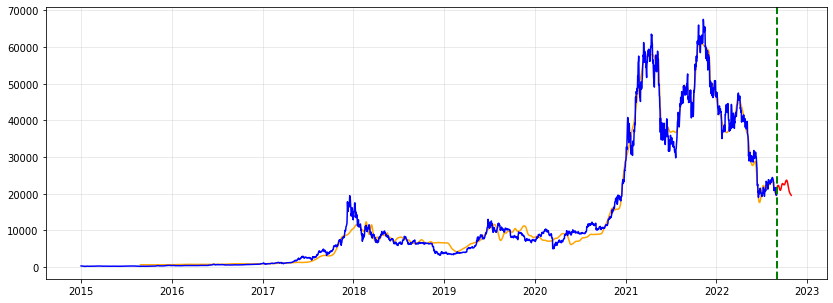

In [30]:
# Set plot size 
from pylab import rcParams
rcParams['figure.figsize'] = 14, 5

# Plot parameters
START_DATE_FOR_PLOTTING = '2015-08-28'

plt.plot(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE['Open'], color='r', label='Predicted Stock Price')
plt.plot(PREDICTION_TRAIN.index, PREDICTION_TRAIN.loc[START_DATE_FOR_PLOTTING:]['Open'], color='orange', label='Training predictions')
plt.plot(datelist_train, dataset_train['Open'], color='b', label='Actual Stock Price')

plt.axvline(x = min(PREDICTIONS_FUTURE.index), color='green', linewidth=2, linestyle='--')

plt.grid(which='major', color='#cccccc', alpha=0.5)

# plt.legend(shadow=True)
# plt.title('Predcitions and Acutal Stock Prices', family='Arial', fontsize=12)
# plt.xlabel('Timeline', family='Arial', fontsize=10)
# plt.ylabel('Stock Price Value', family='Arial', fontsize=10)
# plt.xticks(rotation=45, fontsize=8)
plt.show()

In [31]:
pred = np.array(PREDICTION_TRAIN["Open"])
diff = pred - test
diffLSTM=list(diff)[1:]
diffLSTM=np.array(diffLSTM)
print("MSE:", np.mean(diffLSTM**2))
print("MAE:", np.mean(abs(diffLSTM)))
print("RMSE:", np.sqrt(np.mean(diffLSTM**2)))

MSE: 3646280.3204633966
MAE: 1303.6246786220108
RMSE: 1909.5235846837286


In [32]:
PREDICTION_TRAIN

,Open
2015-08-28,627.520569
2015-08-29,627.905334
2015-08-30,628.327209
2015-08-31,628.792053
2015-09-01,629.296936
...,...
2022-08-27,19970.326172
2022-08-28,19868.234375
2022-08-29,19772.646484
2022-08-30,19674.138672


In [33]:
test

239       224.701004
240       231.548996
241       229.895004
242       229.113998
243       230.255997
            ...     
2795    20262.480469
2796    20041.035156
2797    19615.154297
2798    20298.611328
2799    19799.582031
Name: Open, Length: 2561, dtype: float64

In [34]:
pred=[]
for val in PREDICTION_TRAIN['Open']:
  pred.append(val)

In [35]:
testValues=[]
percentageError=[]

for val in test:
  testValues.append(val)

for idx in range(len(testValues)):
  diff=abs(float(pred[idx])-float(testValues[idx]))
  percentageError.append(diff/float(testValues[idx]))


sum=0
for val in percentageError:
  sum+=val

print("Percentage of Error ",100*sum/len(percentageError),'%')

Percentage of Error  24.609710342352635 %


In [36]:
pred=[]
for val in PREDICTION_TRAIN['Open']:
  pred.append(val)
for i in range(len(pred)):
  pred[i]=int(pred[i])

testValues=[]
for val in test:
  testValues.append(float(val))

from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

print('MSE: ',np.sqrt(mean_squared_error(testValues, pred)))
print("Mean Absolute Error: ",mean_absolute_error(testValues, pred))
print("R2 Score: ",r2_score(testValues, pred))

MSE:  1909.1896495194328
Mean Absolute Error:  1303.2030436399843
R2 Score:  0.9872035173000032
